In [89]:
import numpy as np 
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle 

# Import Data
    we know the first column of the dataframe is the individual ID
    so lets make it an index column 

In [43]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col= 0)
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


# Explore Data

In [44]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [45]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

we will be using a Pearson Correlation (default approach to most correlations)
    describes the linearr dependency between variables
    ranges from -1 to 1 (1 = very postitve correlation, -1 = strong negative correlation, 0 = not linearly independent)

the diagonal values show the correlation of a variable with itself
    so it's always 1

we see a strong positive correlation between age and education (0.65)
    older people are more likely to be educated

we see a strong positive correlation between income and occupation (0.68)
    if you have a higher salary, you are more likely to live in a higher housing 
    

we see a correlation between education and income 

we see a positive correlation between sex and marital status

In [46]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


# Creating a Heatmap

figsize = width,height
vmin & vmax sets the boundaries (-1 & 1 was the range for the Pearson Correlation)

we need to label our graph 
    labels for y and x axis (rotate x label by 90 degrees)
set a title as well 

<function matplotlib.pyplot.show(close=None, block=None)>

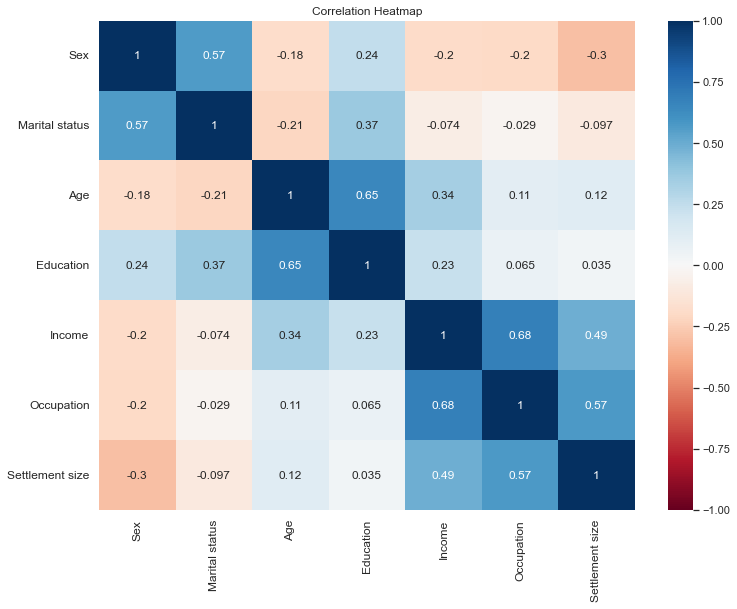

In [47]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show

# Visualize Raw Data

plotting against different columns 

Text(0.5, 1.0, 'Visualization of Raw Data')

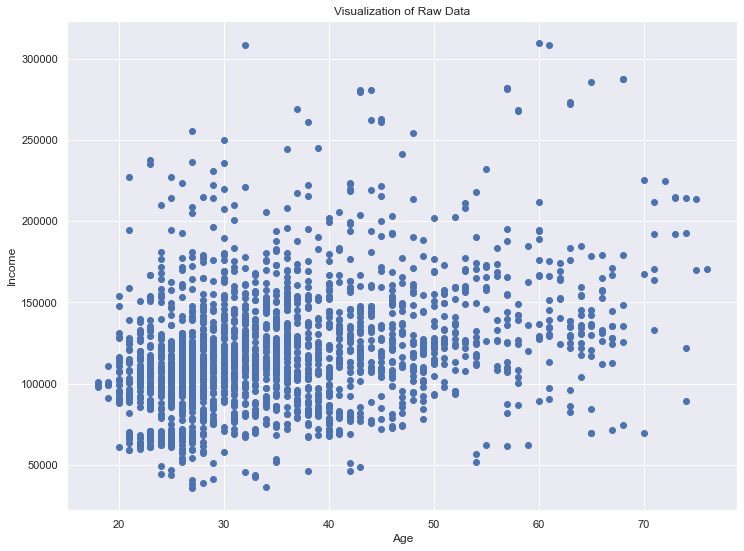

In [48]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

# Standardizing the Data

the purpose
    say we have a 20 and a 70 year old (the differnce is 50 years)
    20 year old makes $100k and the 70 year old makes $150k (difference is $50k)

    if we don't standardize the data, the age would be ruled out and more weight would be put on the income difference in our model

    we need to treat all our features the same and make sure they all fall within the same numerical range 

In [49]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Hierarchical Clustering 

dendrogram: tree-like, hierarchical representation of points

linkage = refers to the specifc clusterinig methods we employ

ward = performs a hierarchical clustering with our data


In [50]:
hier_clust = linkage(segmentation_std, method = 'ward')

# What does the graph mean 

The bottom of the plot are the observations
    that means the 2000 people (or individual points) in our dataset

the distance is the y-axis  
    the distance between the points are represented by the vertical lines 
    the smaller the distance between the points, the further down in the tree their be grouped together 

we are going to truncate plot which will show us the last 5 merged cluster levels 

<function matplotlib.pyplot.show(close=None, block=None)>

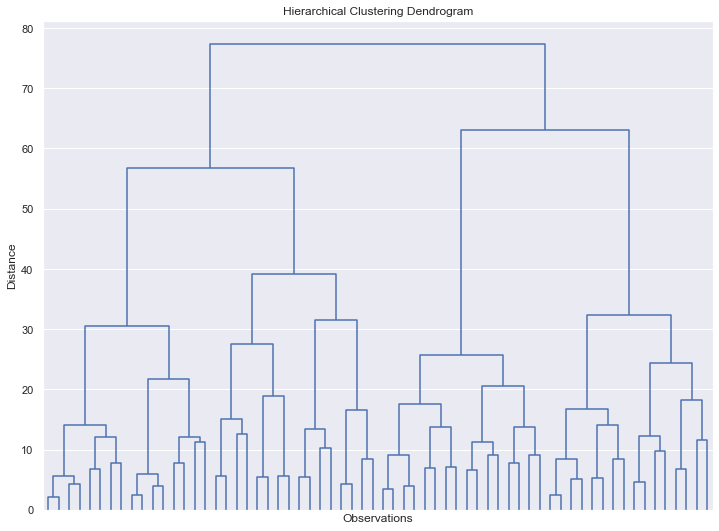

In [51]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
            truncate_mode = 'level',
            p = 5,
            show_leaf_counts = False,
            no_labels = True,
            color_threshold = 0)
plt.show


# removing the color threshold to see the four cluster

<function matplotlib.pyplot.show(close=None, block=None)>

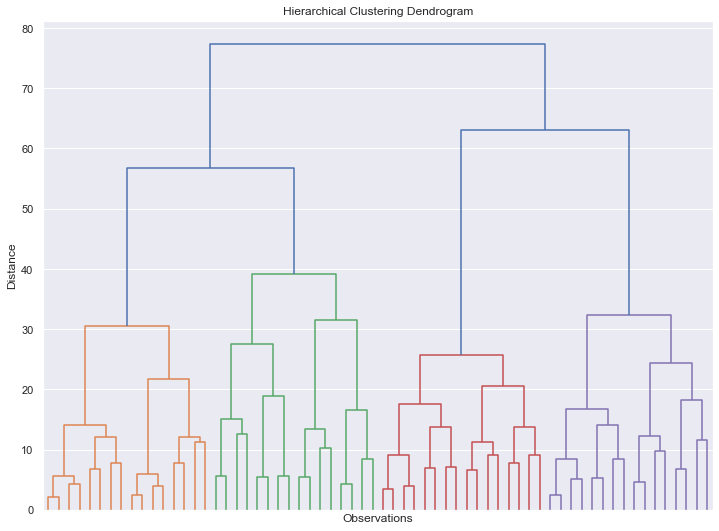

In [52]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
            truncate_mode = 'level',
            p = 5,
            show_leaf_counts = False,
            no_labels = True)
plt.show

# K-means clustering

using WCSS

you want to run the algorithm 10 different times 

k-means++ = is an initialization algorithm that finds the best cluster seeds (finds the best starting points for the centroids)

random_state = insures we will get the same initial centroids if we run the code multiple times (set to any number you like)

in each iteration we add a value to the (WCSS) arrray which is stored in the (Inertia) attribute 


In [53]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)


# Plot the results 

WCSS values against the # of clusters 

x axis will have range (1,11)
y axis will have the WCSS variable 

we see the graph drastically decreasing
    sometimes is can decrease rapidly, other times more smoothly

How do we determine the number of clusters we want?
    the 'Elbow Method'
    usuallly the part of the graph before the elbow would be steeply declining and the part after it would be smooth
    so we can assume 4 is the right amount 


Because we have only 4 clusters, the algorithm with more than 10 will not yield an improvement in the results 
    in cases where there are more clusters, a loop with more iterations should be performed

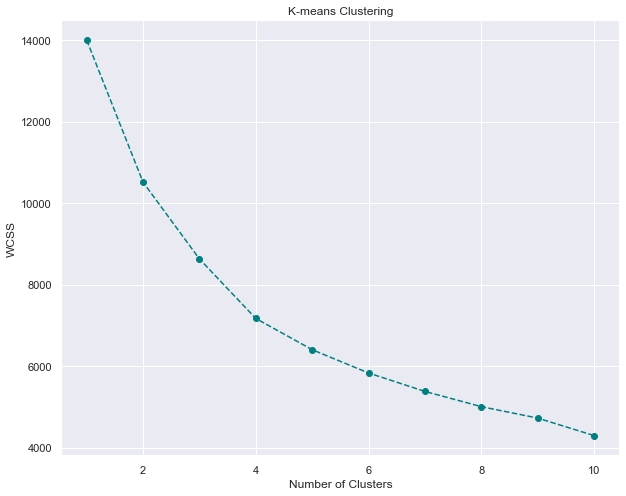

In [54]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--', color = 'teal')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()



# Performing K-Means Clusterings w/ 4 clusters

In [55]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# We Fit the data using our standardize data 

In [56]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

# Results

Add a new column and copy dataframe

new column will contain the predictive clusters for each observation in the dataset 

In [57]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_


# We will try to understand what the different clusters mean 

    what the characteristics of the people in each of the clusters are 

We will calculate the means value of each features by clusters 

In [58]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


# We have found the mean to our clusters

    now we have to interpret them

# Now we need to look at the size of the clusters compared to the entire dataset

Note in the 'group by' statement we need to include a second argument (column), in order to count each row in the table.
    You can chose an arbitrary column, we select 'Sex'

new column called number of observations (N Obs)

In [59]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

# Calculate the proportions of these segments

    We want to know how much of the whole population each cluster represents 

    new column called proportion of observations (Prop Obs)

In [60]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [61]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


# Adding the information into our tables 

In [62]:
df_segm_analysis.rename({0:'well-off',
                        1:'fewer-opportunities',
                        2:'standard',
                        3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


# Visualizing our Data 

we are plotting the raw data rather then the standardize 
    the only difference is that this time we have the segments 

add new segments to df_segm_kmeans
    we need to map our new labels to the segment names (0,1,2,3)

In [63]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer-opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})

# We initialize the x and y axis first for convenience 

    we can use the segment labels as colors 

/Users/justjp/opt/miniconda3/envs/customer_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


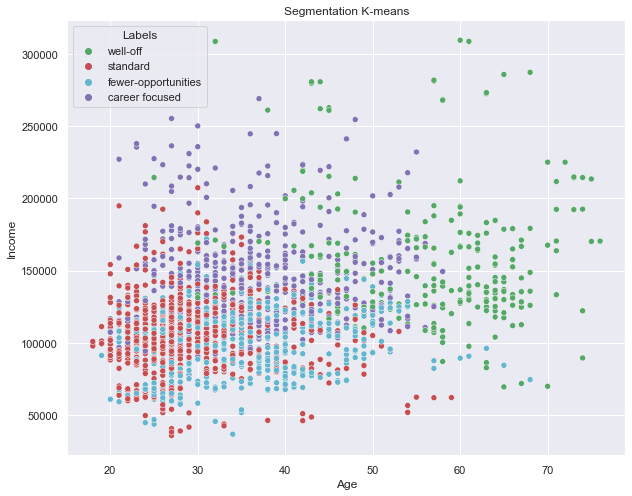

In [64]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

# PCA

Applying PCA to our standardized data

PCA creates as many components as their are features (columns) whichf for us would be 7
    components are arranged in order of importance (how much of the variants of our data is explained by each component)


In [65]:
pca = PCA()

In [66]:
pca.fit(segmentation_std)

PCA()

# We can see their are 7 components 

it applied a linear transformation on our data which created 7 new variables 
    some of them contain a large proportion of variants while others almost none

together these 7 components explain 100% of the variability of the data 
    that's why if you sum them all up it equals 1 (components variance always sums up to 1) 

we can see that the first components explains around 36% of the variability of the data then (26%, 19%, etc)

In [67]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

# Find a subset of components, while preserving variance 

logically we want to include the most prominent components 
    so if we were to choose two components we would choose the first 2 as they contain most of the variants 

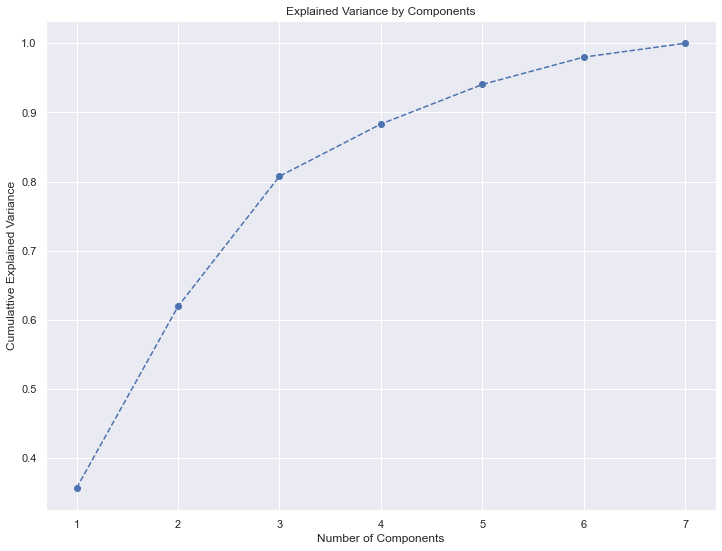

In [68]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulattive Explained Variance')
plt.show()

# Keeping only 3 components 

In [69]:
pca = PCA(n_components = 3)

In [70]:
pca.fit(segmentation_std)

PCA(n_components=3)

# Analyzing the PCA Results 

it's a 3x7 array
    reduced features to 3 components, the values themselves show the so called loadings

    loadings = correlations between an original variable and a component
        the first value is the array shows the loading of the first feature of the first component


In [71]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

# Putting the array in a Pandas data frame

all values are between -1 and 1
    as they are basically correlations 

the closer the result is to 0, the lower the loading of a variable onto a component 




In [72]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7fa45c8bd9d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

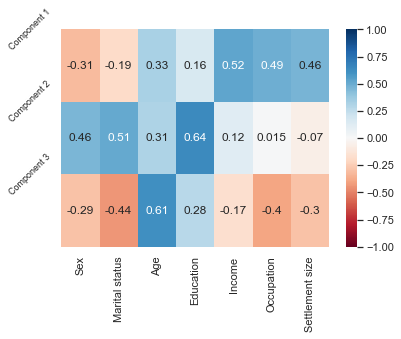

In [73]:
sns.heatmap(df_pca_comp, vmin= -1, 
            vmax= 1, 
            cmap = 'RdBu', 
            annot= True)
plt.yticks([0,1,2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

# How is our data related to these new features?

original data referred to the original 7 features, making it 7th dimensional
    we must transform it into 3 dimensional

then we get a new array where each observation is described by the three components 
    that's why their are only three columns 

these new values are called PCA scores 

In [74]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [75]:
scores_pca = pca.transform(segmentation_std)

# K-means clustering w/ PCA


PCA scores are already standardized


In [76]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

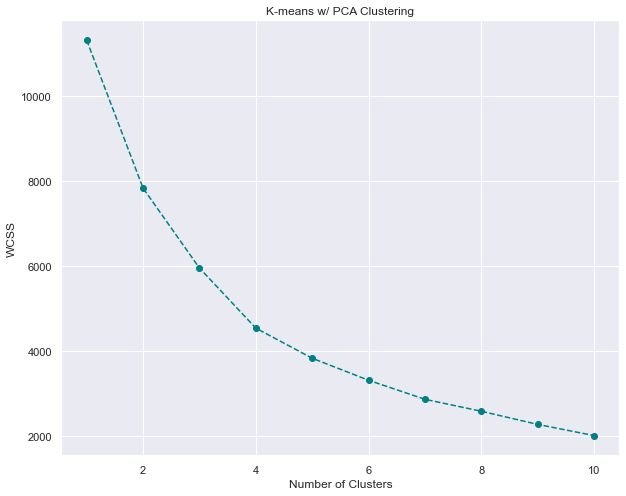

In [77]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--', color = 'teal')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means w/ PCA Clustering')
plt.show()

# We see will be working with 4 clusters 

In [78]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [79]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

# K-means Clustering w/ PCA Results 

creating a new data frame 

In [80]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [81]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


# Calculate the mean values of each feature by clusters 
    we will use the group by method

In [82]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


# How many people belong to each cluster 

In [83]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'well-off',
                                                          1:'fewer-opportunities',
                                                          2:'standard',
                                                          3:'career focused'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
well-off,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
fewer-opportunities,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
standard,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
career focused,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


# Visualizing Clusters on a 2D plane

choosing two of the components

addiing segment names to the labels 
    we did it in the freq dataframe but not the main one

In [85]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'well-off',
                                                                               1:'fewer-opportunities',
                                                                               2:'standard',
                                                                               3:'career focused'})

/Users/justjp/opt/miniconda3/envs/customer_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clusters by PCA Components')

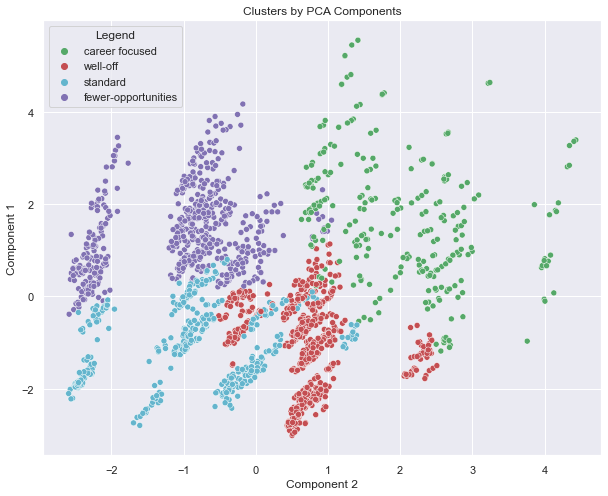

In [88]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')

# Data Export 

pickle is a module used to turn Python objects into strings 
    once we need them again, we simply import them into a different notebook while keeping all the information

we need the scaler to preprocess future data in the same way 

dump is the command which indicates that we want to export a file 

pca and kmeans_pca will allow us to segment new data points based on the criteria we developed here 

In [90]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [92]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [93]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))